In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
IMDB = pd.read_csv('IMDB-Movie-Data.csv', index_col = "Title")
IMDB

,Rank,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Title,,,,,,,,,,,
Guardians of the Galaxy,1,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
Split,3,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
Sing,4,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
Suicide Squad,5,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0
...,...,...,...,...,...,...,...,...,...,...,...
Secret in Their Eyes,996,"Crime,Drama,Mystery","A tight-knit team of rising investigators, alo...",Billy Ray,"Chiwetel Ejiofor, Nicole Kidman, Julia Roberts...",2015,111,6.2,27585,NaN,45.0
Hostel: Part II,997,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152,17.54,46.0
Step Up 2: The Streets,998,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699,58.01,50.0


In [3]:
IMDB.drop_duplicates(inplace = True)
IMDB.shape

(1000, 11)

In [4]:
IMDB.columns

Index(['Rank', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

In [6]:
IMDB.rename(columns={'Runtime (Minutes)':'Runtime', 'Revenue (Millions)': 'Revenue_Millions'}, inplace = True)
IMDB.columns = [col.lower() for col in IMDB]
IMDB.columns

Index(['rank', 'genre', 'description', 'director', 'actors', 'year', 'runtime',
       'rating', 'votes', 'revenue_millions', 'metascore'],
      dtype='object')

In [10]:
IMDB.isnull().sum()

rank                  0
genre                 0
description           0
director              0
actors                0
year                  0
runtime               0
rating                0
votes                 0
revenue_millions    128
metascore            64
dtype: int64

In [18]:
revenue = IMDB['revenue_millions']
metascore = IMDB['metascore']


Title
Guardians of the Galaxy    76.0
Prometheus                 65.0
Split                      62.0
Sing                       59.0
Suicide Squad              40.0
The Great Wall             42.0
La La Land                 93.0
Mindhorn                   71.0
The Lost City of Z         78.0
Passengers                 41.0
Name: metascore, dtype: float64

In [19]:
revenue_mean = revenue.mean()
metascore_mean = metascore.mean()

In [20]:
revenue.fillna(revenue_mean, inplace = True)
metascore.fillna(metascore_mean, inplace = True)
IMDB.isnull().sum()

rank                0
genre               0
description         0
director            0
actors              0
year                0
runtime             0
rating              0
votes               0
revenue_millions    0
metascore           0
dtype: int64

In [29]:
IMDB.describe()

,rank,year,runtime,rating,votes,revenue_millions,metascore
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000
mean,500.500000,2012.783000,113.172000,6.723200,1.698083e+05,82.956376,58.985043
std,288.819436,3.205962,18.810908,0.945429,1.887626e+05,96.412043,16.634858
min,1.000000,2006.000000,66.000000,1.900000,6.100000e+01,0.000000,11.000000
25%,250.750000,2010.000000,100.000000,6.200000,3.630900e+04,17.442500,47.750000
50%,500.500000,2014.000000,111.000000,6.800000,1.107990e+05,60.375000,58.985043
75%,750.250000,2016.000000,123.000000,7.400000,2.399098e+05,99.177500,71.000000
max,1000.000000,2016.000000,191.000000,9.000000,1.791916e+06,936.630000,100.000000


In [23]:
IMDB['genre'].describe()

count                        1000
unique                        207
top       Action,Adventure,Sci-Fi
freq                           50
Name: genre, dtype: object

In [27]:
IMDB['genre'].value_counts().head(20)

Action,Adventure,Sci-Fi       50
Drama                         48
Comedy,Drama,Romance          35
Comedy                        32
Drama,Romance                 31
Animation,Adventure,Comedy    27
Action,Adventure,Fantasy      27
Comedy,Drama                  27
Comedy,Romance                26
Crime,Drama,Thriller          24
Crime,Drama,Mystery           23
Action,Adventure,Drama        18
Action,Crime,Drama            17
Horror,Thriller               16
Drama,Thriller                15
Adventure,Family,Fantasy      14
Biography,Drama,History       14
Action,Adventure,Comedy       14
Biography,Drama               14
Action,Comedy,Crime           12
Name: genre, dtype: int64

In [30]:
IMDB.corr()
#we can for example see strong correlation between revenue-votes or metascore-rating

,rank,year,runtime,rating,votes,revenue_millions,metascore
rank,1.000000,-0.261605,-0.221739,-0.219555,-0.283876,-0.252996,-0.185159
year,-0.261605,1.000000,-0.164900,-0.211219,-0.411904,-0.117562,-0.076077
runtime,-0.221739,-0.164900,1.000000,0.392214,0.407062,0.247834,0.202239
rating,-0.219555,-0.211219,0.392214,1.000000,0.511537,0.189527,0.604723
votes,-0.283876,-0.411904,0.407062,0.511537,1.000000,0.607941,0.318116
revenue_millions,-0.252996,-0.117562,0.247834,0.189527,0.607941,1.000000,0.132304
metascore,-0.185159,-0.076077,0.202239,0.604723,0.318116,0.132304,1.000000


In [34]:
subset = IMDB[['genre', 'rating', 'metascore']]
subset.head(10)

,genre,rating,metascore
Title,,,
Guardians of the Galaxy,"Action,Adventure,Sci-Fi",8.1,76.0
Prometheus,"Adventure,Mystery,Sci-Fi",7.0,65.0
Split,"Horror,Thriller",7.3,62.0
Sing,"Animation,Comedy,Family",7.2,59.0
Suicide Squad,"Action,Adventure,Fantasy",6.2,40.0
The Great Wall,"Action,Adventure,Fantasy",6.1,42.0
La La Land,"Comedy,Drama,Music",8.3,93.0
Mindhorn,Comedy,6.4,71.0
The Lost City of Z,"Action,Adventure,Biography",7.1,78.0


In [35]:
prometheus = IMDB.loc['Prometheus']
prometheus

rank                                                                2
genre                                        Adventure,Mystery,Sci-Fi
description         Following clues to the origin of mankind, a te...
director                                                 Ridley Scott
actors              Noomi Rapace, Logan Marshall-Green, Michael Fa...
year                                                             2012
runtime                                                           124
rating                                                            7.0
votes                                                          485820
revenue_millions                                               126.46
metascore                                                        65.0
Name: Prometheus, dtype: object

In [36]:
movie_subset = IMDB.loc['Prometheus':'Sing']
movie_subset

,rank,genre,description,director,actors,year,runtime,rating,votes,revenue_millions,metascore
Title,,,,,,,,,,,
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
Split,3,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
Sing,4,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0


In [38]:
condition = (IMDB['director'] == 'Ridley Scott')
condition

Title
Guardians of the Galaxy    False
Prometheus                  True
Split                      False
Sing                       False
Suicide Squad              False
                           ...  
Secret in Their Eyes       False
Hostel: Part II            False
Step Up 2: The Streets     False
Search Party               False
Nine Lives                 False
Name: director, Length: 1000, dtype: bool

In [39]:
IMDB[IMDB['director'] == 'Ridley Scott']

,rank,genre,description,director,actors,year,runtime,rating,votes,revenue_millions,metascore
Title,,,,,,,,,,,
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
The Martian,103,"Adventure,Drama,Sci-Fi",An astronaut becomes stranded on Mars after hi...,Ridley Scott,"Matt Damon, Jessica Chastain, Kristen Wiig, Ka...",2015,144,8.0,556097,228.43,80.0
Robin Hood,388,"Action,Adventure,Drama","In 12th century England, Robin and his band of...",Ridley Scott,"Russell Crowe, Cate Blanchett, Matthew Macfady...",2010,140,6.7,221117,105.22,53.0
American Gangster,471,"Biography,Crime,Drama","In 1970s America, a detective works to bring d...",Ridley Scott,"Denzel Washington, Russell Crowe, Chiwetel Eji...",2007,157,7.8,337835,130.13,76.0
Exodus: Gods and Kings,517,"Action,Adventure,Drama",The defiant leader Moses rises up against the ...,Ridley Scott,"Christian Bale, Joel Edgerton, Ben Kingsley, S...",2014,150,6.0,137299,65.01,52.0
The Counselor,522,"Crime,Drama,Thriller",A lawyer finds himself in over his head when h...,Ridley Scott,"Michael Fassbender, Penélope Cruz, Cameron Dia...",2013,117,5.3,84927,16.97,48.0
A Good Year,531,"Comedy,Drama,Romance",A British investment broker inherits his uncle...,Ridley Scott,"Russell Crowe, Abbie Cornish, Albert Finney, M...",2006,117,6.9,74674,7.46,47.0
Body of Lies,738,"Action,Drama,Romance",A CIA agent on the ground in Jordan hunts down...,Ridley Scott,"Leonardo DiCaprio, Russell Crowe, Mark Strong,...",2008,128,7.1,182305,39.38,57.0


In [46]:
IMDB[IMDB['rating'] <= 4.0].head(10)

,rank,genre,description,director,actors,year,runtime,rating,votes,revenue_millions,metascore
Title,,,,,,,,,,,
Don't Fuck in the Woods,43,Horror,A group of friends are going on a camping trip...,Shawn Burkett,"Brittany Blanton, Ayse Howard, Roman Jossart,N...",2016,73,2.7,496,82.956376,58.985043
The Last Face,50,Drama,A director (Charlize Theron) of an internation...,Sean Penn,"Charlize Theron, Javier Bardem, Adèle Exarchop...",2016,130,3.7,987,82.956376,16.000000
The Disappointments Room,238,"Drama,Horror,Thriller",A mother and her young son release unimaginabl...,D.J. Caruso,"Kate Beckinsale, Mel Raido, Duncan Joiner, Luc...",2016,85,3.9,4895,2.410000,31.000000
Satanic,270,Horror,Four friends on their way to Coachella stop of...,Jeffrey G. Hunt,"Sarah Hyland, Steven Krueger, Justin Chon, Cla...",2016,85,3.7,2384,82.956376,58.985043
The Black Room,402,Horror,PAUL and JENNIFER HEMDALE have just moved into...,Rolfe Kanefsky,"Natasha Henstridge, Lukas Hassel, Lin Shaye,Do...",2016,91,3.9,240,82.956376,71.000000
Birth of the Dragon,526,"Action,Biography,Drama","Young, up-and-coming martial artist, Bruce Lee...",George Nolfi,"Billy Magnussen, Terry Chen, Teresa Navarro,Va...",2016,103,3.9,552,93.050000,61.000000
2307: Winter's Dream,617,Sci-Fi,"In 2307, a future soldier is sent on a mission...",Joey Curtis,"Paul Sidhu, Branden Coles, Arielle Holmes, Kel...",2016,101,4.0,277,20.760000,53.000000
Tall Men,648,"Fantasy,Horror,Thriller",A challenged man is stalked by tall phantoms i...,Jonathan Holbrook,"Dan Crisafulli, Kay Whitney, Richard Garcia, P...",2016,133,3.2,173,82.956376,57.000000
Disaster Movie,830,Comedy,"Over the course of one evening, an unsuspectin...",Jason Friedberg,"Carmen Electra, Vanessa Lachey,Nicole Parker, ...",2008,87,1.9,77207,14.170000,15.000000


In [47]:
IMDB[(IMDB['rating'] <= 4.0) | (IMDB['rating'] >= 9.0)].head(10)

,rank,genre,description,director,actors,year,runtime,rating,votes,revenue_millions,metascore
Title,,,,,,,,,,,
Don't Fuck in the Woods,43,Horror,A group of friends are going on a camping trip...,Shawn Burkett,"Brittany Blanton, Ayse Howard, Roman Jossart,N...",2016,73,2.7,496,82.956376,58.985043
The Last Face,50,Drama,A director (Charlize Theron) of an internation...,Sean Penn,"Charlize Theron, Javier Bardem, Adèle Exarchop...",2016,130,3.7,987,82.956376,16.000000
The Dark Knight,55,"Action,Crime,Drama",When the menace known as the Joker wreaks havo...,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart,Mi...",2008,152,9.0,1791916,533.320000,82.000000
The Disappointments Room,238,"Drama,Horror,Thriller",A mother and her young son release unimaginabl...,D.J. Caruso,"Kate Beckinsale, Mel Raido, Duncan Joiner, Luc...",2016,85,3.9,4895,2.410000,31.000000
Satanic,270,Horror,Four friends on their way to Coachella stop of...,Jeffrey G. Hunt,"Sarah Hyland, Steven Krueger, Justin Chon, Cla...",2016,85,3.7,2384,82.956376,58.985043
The Black Room,402,Horror,PAUL and JENNIFER HEMDALE have just moved into...,Rolfe Kanefsky,"Natasha Henstridge, Lukas Hassel, Lin Shaye,Do...",2016,91,3.9,240,82.956376,71.000000
Birth of the Dragon,526,"Action,Biography,Drama","Young, up-and-coming martial artist, Bruce Lee...",George Nolfi,"Billy Magnussen, Terry Chen, Teresa Navarro,Va...",2016,103,3.9,552,93.050000,61.000000
2307: Winter's Dream,617,Sci-Fi,"In 2307, a future soldier is sent on a mission...",Joey Curtis,"Paul Sidhu, Branden Coles, Arielle Holmes, Kel...",2016,101,4.0,277,20.760000,53.000000
Tall Men,648,"Fantasy,Horror,Thriller",A challenged man is stalked by tall phantoms i...,Jonathan Holbrook,"Dan Crisafulli, Kay Whitney, Richard Garcia, P...",2016,133,3.2,173,82.956376,57.000000


In [52]:
IMDB[((IMDB['year'] >= 2004) & (IMDB['year'] <= 2009)) & (IMDB['rating'] > 8.0) & (IMDB['revenue_millions'] < IMDB['revenue_millions'].quantile(0.25))]

,rank,genre,description,director,actors,year,runtime,rating,votes,revenue_millions,metascore
Title,,,,,,,,,,,
3 Idiots,431,"Comedy,Drama",Two friends are searching for their long lost ...,Rajkumar Hirani,"Aamir Khan, Madhavan, Mona Singh, Sharman Joshi",2009,170,8.4,238789,6.52,67.0
The Lives of Others,477,"Drama,Thriller","In 1984 East Berlin, an agent of the secret po...",Florian Henckel von Donnersmarck,"Ulrich Mühe, Martina Gedeck,Sebastian Koch, Ul...",2006,137,8.5,278103,11.28,89.0
Taare Zameen Par,992,"Drama,Family,Music",An eight-year-old boy is thought to be a lazy ...,Aamir Khan,"Darsheel Safary, Aamir Khan, Tanay Chheda, Sac...",2007,165,8.5,102697,1.20,42.0


In [58]:
def rating_function(x):
    if x >= 7.0:
        return "good"
    elif x >= 5.0 and x < 7.0:
        return "okay"
    else:
        return "bad"

In [59]:
IMDB['rating_category'] = IMDB['rating'].apply(rating_function)
IMDB.head(5)

,rank,genre,description,director,actors,year,runtime,rating,votes,revenue_millions,metascore,rating_category
Title,,,,,,,,,,,,
Guardians of the Galaxy,1,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0,good
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0,good
Split,3,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0,good
Sing,4,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0,good
Suicide Squad,5,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0,okay


In [60]:
plt.rcParams.update({'font.size': 20, 'figure.figsize': (10, 8)})

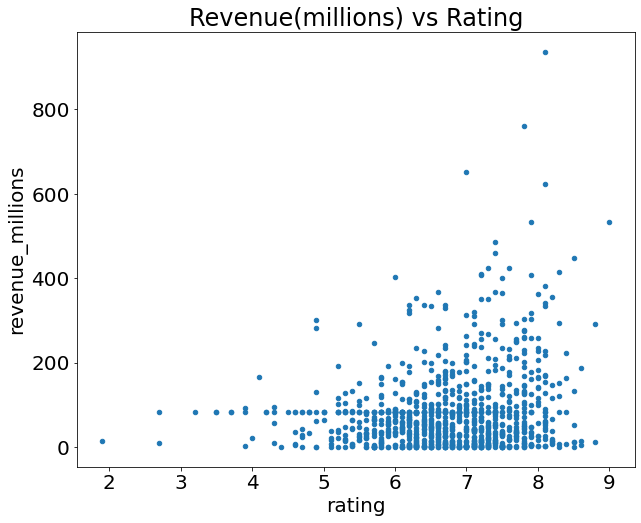

In [62]:
IMDB.plot(kind = 'scatter', x='rating', y='revenue_millions', title ='Revenue(millions) vs Rating');

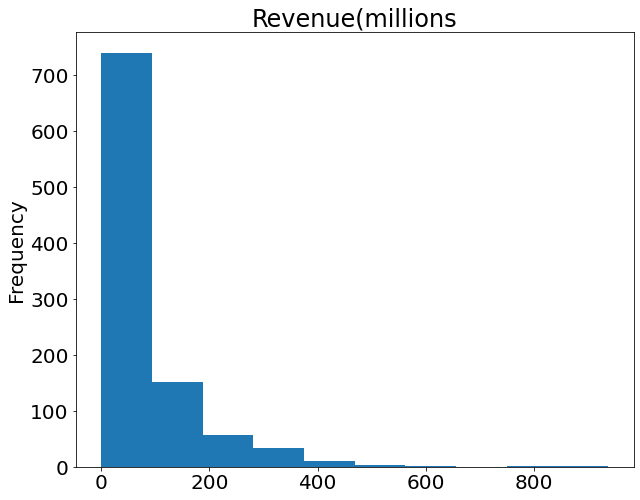

In [63]:
IMDB['revenue_millions'].plot(kind = 'hist', title='Revenue(millions');

In [64]:
IMDB['revenue_millions'].describe()

count    1000.000000
mean       82.956376
std        96.412043
min         0.000000
25%        17.442500
50%        60.375000
75%        99.177500
max       936.630000
Name: revenue_millions, dtype: float64

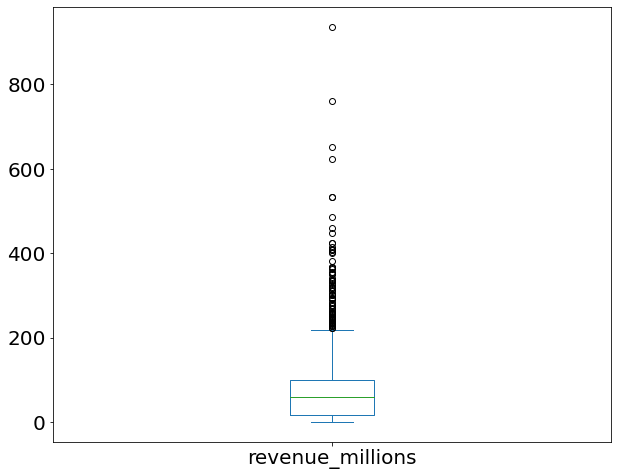

In [65]:
IMDB['revenue_millions'].plot(kind='box');

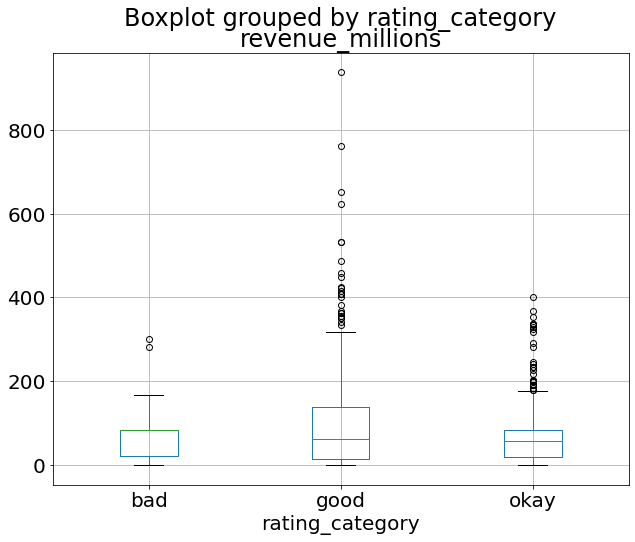

In [66]:
IMDB.boxplot(column='revenue_millions', by='rating_category');

In [69]:
corr_matrix = IMDB.corr()
corr_matrix

,rank,year,runtime,rating,votes,revenue_millions,metascore
rank,1.000000,-0.261605,-0.221739,-0.219555,-0.283876,-0.252996,-0.185159
year,-0.261605,1.000000,-0.164900,-0.211219,-0.411904,-0.117562,-0.076077
runtime,-0.221739,-0.164900,1.000000,0.392214,0.407062,0.247834,0.202239
rating,-0.219555,-0.211219,0.392214,1.000000,0.511537,0.189527,0.604723
votes,-0.283876,-0.411904,0.407062,0.511537,1.000000,0.607941,0.318116
revenue_millions,-0.252996,-0.117562,0.247834,0.189527,0.607941,1.000000,0.132304
metascore,-0.185159,-0.076077,0.202239,0.604723,0.318116,0.132304,1.000000


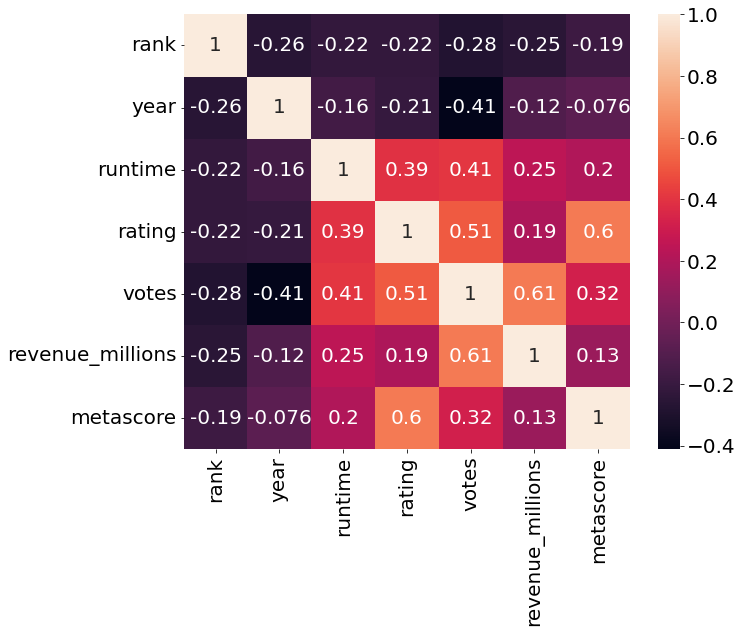

In [70]:
sb.heatmap(corr_matrix, annot=True)
plt.show()